In [75]:
#reffered https://www.youtube.com/watch?v=j-3vuBynnOE
import numpy as np 
import matplotlib.pyplot as plt
import os 
import cv2
DATADIR = "/home/v/Projects/pro_ml/extracted_data"
CATEGORIES = ["0","5","10"]

# this is for test
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    print(path)
    fpath=[]
    for root,d_names,f_names in os.walk(path):
        for f in f_names:
            fpath.append(os.path.join(root, f))
    for file in fpath:
        img_array = cv2.imread(file,0)
        break

/home/v/Projects/pro_ml/extracted_data/0
/home/v/Projects/pro_ml/extracted_data/5
/home/v/Projects/pro_ml/extracted_data/10


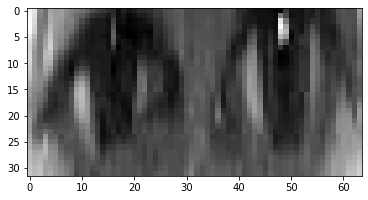

In [76]:
# how one of the file is
plt.imshow(img_array,cmap="gray")

In [77]:
print(img_array.shape)


(32, 64)


In [78]:
training_data=[]
def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        print(path)
    
        fpath=[]
        for root,d_names,f_names in os.walk(path):
            for f in f_names:
                fpath.append(os.path.join(root, f))
        for file in fpath:
            try:
                img_array = cv2.imread(file,0) # 0 for gray scale
                training_data.append([img_array,int(category)])
                # print(file,"label   ",category,int(category))
            except Exception as e :
                print(e)
                print("oops")

create_train_data()

/home/v/Projects/pro_ml/extracted_data/0
/home/v/Projects/pro_ml/extracted_data/5
/home/v/Projects/pro_ml/extracted_data/10


In [79]:
training_data[0]

[array([[72, 90, 85, ..., 66, 68, 74],
        [66, 83, 83, ..., 63, 71, 72],
        [72, 66, 83, ..., 62, 72, 71],
        ...,
        [96, 86, 70, ..., 69, 72, 77],
        [94, 84, 70, ..., 71, 76, 79],
        [96, 85, 74, ..., 72, 80, 82]], dtype=uint8),
 0]

In [80]:
print(len(training_data))


29390


In [81]:
labels=[]
for data in training_data:
    labels.append(data[1])
c5,c10,c0 = 0,0,0

# clean this later
for i in labels:
    if i ==5 :
        c5 +=1
    elif i == 10:
        c10 +=1
    elif i== 0:
        c0 +=1
    else :
        print(i)
        break
# the count of data we have
print("0 :",c0)
print("5 :",c5)
print("10 :",c10) # sum should be len of training data

0 : 9963
5 : 9837
10 : 9590


In [82]:
# we are gonna shuffle our data we have
# this will lead to better training 
import random
random.shuffle(training_data)

In [83]:
# we are gona convert our labels 
# FROM 0 5 10  to 0 1 2
X=[]
y=[]
for feeature,label in training_data:
    X.append(feeature)
    y.append(label//5) # the conversion lol
X=np.array(X).reshape(-1,32,64) # resizing the flattened stuff -1 for all , 32*64 size 


29390
29390
(32, 64)
(32, 64)


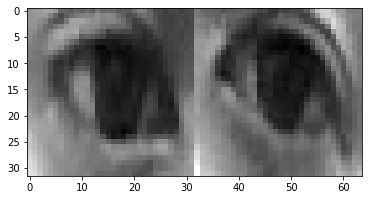

In [84]:
# jus making sure we haven't destroyed the data
print(len(X))
print(len(training_data))
print(img_array.shape)
print(X[0].shape)
plt.imshow(X[0],cmap="gray")

In [85]:
import pickle5 as pickle
pickle_out = open("X.pickle","wb") # file named X.pickle_fold5
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out = open("y.pickle","wb") # file named y.pickle_fold5
pickle.dump(y,pickle_out)
pickle_out.close()
# we have saved our data 


In [86]:
# lets try loading it 
pickle_in=open("X.pickle","rb")# note RRRRRRRRRR
XX=pickle.load(pickle_in)
pickle_in=open("y.pickle","rb")# note RRRRRRRRRR
yy=pickle.load(pickle_in)

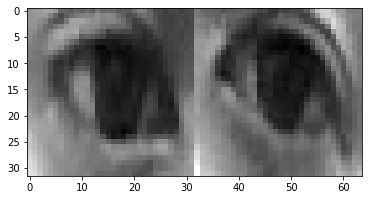

In [87]:
plt.imshow(XX[0],cmap="gray")

(32, 32)
(32, 32)


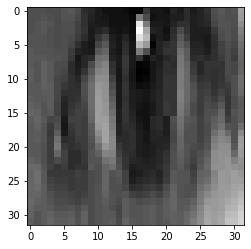

In [88]:
# after cropping into two
from customcvfunc import imagesplitter
l,r=imagesplitter(img_array)
print(l.shape)
plt.imshow(l,cmap="gray")
print(r.shape)
plt.imshow(r,cmap="gray")